In [1]:
import requests
import json
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
from IPython.core.display import display, HTML
import os
from os import path

In [2]:
html_dir = "../../docs/graphs/transparency_report/"
if not path.exists(html_dir):
    try:
        os.makedirs(html_dir)
    except:
        print("Could not make directory")
        exit(1)

In [3]:
def get_data(link, feature):
    res = requests.get(link)
    data = json.loads(res.content)
    df = pd.DataFrame(data.items(), columns=['date', feature])  
    df['Daily Increase'] = (df[feature]-df[feature].shift()).fillna(0).astype(int)
    return df

In [4]:
def draw_graph(df, feature, name):
    html_path = "https://harmony-one.github.io/harmony-log-analysis/" + html_dir.replace("../../docs/", "")
    if "txs_count" in name:
        fig = px.line(df, x='date', y=feature, color_discrete_sequence = ['#99d6ff'], title = 'Harmony Daily Transaction Chart')
    else:
        hover = df.columns.tolist()
        fig = px.area(df, x='date', y=feature, color_discrete_sequence = ['#99d6ff'], hover_data=hover, title = 'Harmony Unique Address Chart')

    fig.update_xaxes({'showgrid': False, 'showspikes': True, 'title': None})
    fig.update_yaxes({'gridcolor': "#E8E8E8"})
    fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)', "title_x": 0.5, 'hovermode': 'closest'})
#     fig.show(renderer="svg",width=800, height=500)
    fig.write_html("{:s}{:s}.html".format(html_dir, name))
    print("HTML saved in " )
    display_path = "{:s}{:s}.html".format(html_path, name)
    display(HTML("<a href='" + display_path + "' target='_blank'>" + display_path + "</a>"))
    return fig

HTML saved in 


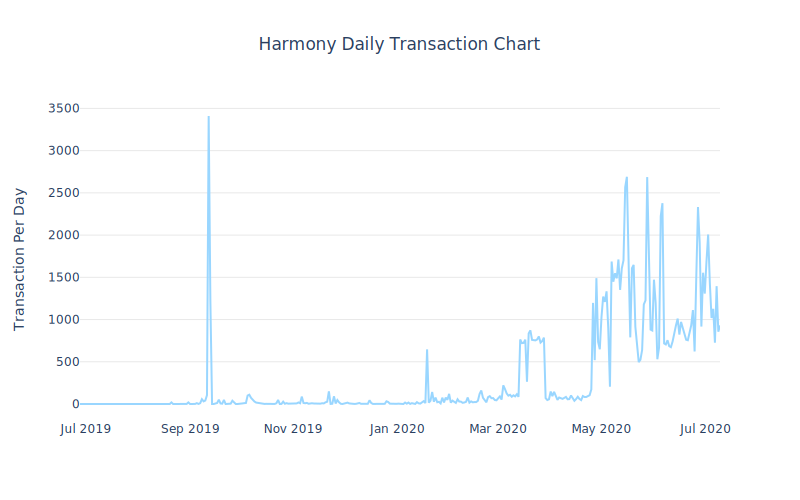

In [5]:
link = "https://harmony-explorer-mainnet.firebaseio.com/total-txs-count.json"
feature = 'Harmony Cumulative Transaction Growth'
df = get_data(link, feature)
new_df = df[['date','Daily Increase']].loc[1:]
new_df['date'] = pd.to_datetime(new_df['date'],format ='%Y_%m_%d')

old_df = pd.read_csv("data/daily_txs.csv", header = 0)
old_df = old_df[old_df['date'] < '2020-07-07']
old_df.rename(columns = {'txs-count':'Daily Increase'}, inplace = True)
old_df['date'] = pd.to_datetime(old_df['date'],format ='%Y-%m-%d')

merge_df = pd.concat([old_df, new_df], axis=0)
merge_df.reset_index(drop = True, inplace = True)
fig = draw_graph(merge_df, 'Daily Increase', "daily_txs_count")
fig.update_layout(yaxis_title="Transaction Per Day")
fig.show(renderer="svg",width=800, height=500)